In [1]:
%matplotlib inline
import csv
import os
import glob
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#object_observed = "USA 227 [37377, 2011-011A]"
#frequency = "2242.499"

#object_observed = "AEHF-2 [38254, 2012-019A]"
#frequency = "2267.512"

#object_observed = "USA 167 [27691, 2003-008A]"
#frequency = "2277.514"

#object_observed = "WGS-6 [39222, 2013-041A]"
#frequency = "2277.510"

#object_observed = "CBAS-2 [55263, 2023-008A]"
#frequency = "2277.500"

#object_observed = "STPSAT-6 [49817, 2021-118A]"
#frequency = "2257.912"

#object_observed = "SLIM [57803, 2023-137D]"
#frequency = "2212.000"

#object_observed = "GOES 17 [43226, 2018-022A]"
#frequency = "2211.056"

#object_observed = "SIRIUS FM-6 [39360, 2013-058A]"
#frequency = "2330.200"
#frequency = "2342.200"

#object_observed = "Zenith AZ:180 EL:90"
#frequency = "2295.000"

#object_observed = "SBIRS GEO 6 [53355, 2022-092A]"
#frequency = "2237.516"
#frequency = "2252.500"

#object_observed = "SBIRS GEO 4 [41937, 2017-004A]"
#frequency = "2237.518"
#frequency = "2262.500"

#object_observed = "DSCOVR [40390, 2015-007A]"
#frequency = "2215.003"

#object_observed = "GOES 18 [51850, 2022-021A]"
#frequency = "2211.056"

# EUTE 7A is LHCP
#object_observed = "EUTE 7A [28187, 2004-008A]"
#frequency = "2265.384"

#object_observed = "GOES 14 [35491, 2009-033A]"
#frequency = "2208.986"

#object_observed = "GPS BIIF-11 (PRN 10) [41019, 2015-062A]"
#object_observed = "GPS BIIF-12 (PRN 32) [41328, 2016-007A]"
#object_observed = "GPS BIIF-10 (PRN 08) [40730, 2015-033A]"
#object_observed = "GPS BIIR-9  (PRN 21) [22704,2003-010A]" NOT ACTIVE
#object_observed = "GPS BIIR-13 (PRN 02) [28474,2004-045A]" 
#object_observed = "GPS BIIRM-2 (PRN 31) [29486, 2006-042A]" NOT ACTIVE
#object_observed = "GPS BIII-6 (PRN 28) [55268, 2023-009A]" 
#object_observed = "GPS BIIF-8 (PRN 03) [40294, 2014-068A]"
#object_observed = "GPS BIII-1 (PRN 04) [43873, 2018-109A]"
#object_observed = "GPS BIIF-7 (PRN 09) [40105, 2014-045A]"
#object_observed = "GPS BIIRM-6 (PRN 07) [32711, 2008-012A]" NOT ACTIVE
object_observed = "GPS BIIF-5 (PRN 30) [39533, 2014-008A]"
#object_observed = "GPS BIII-4 (PRN 14) [46826, 2020-078A]"
#object_observed = "GPS BIIR-11 (PRN 19) [28190, 2004-009A]"Need to review.  
#object_observed = "GPS BIIF-6 (PRN 06) [39741, 2014-026A]" ECLIPSE +/- 1.7MHz comes on
#object_observed = "GPS BIII-5  (PRN 11) [48859, 2021-054A]"
#object_observed = ""
frequency = "2228.52"

#object_observed ="Calibration Source"
#frequency = "2211.056"

In [3]:
def datetime_to_mjd(t):
    mjd_epoch=np.datetime64('1858-11-17T00:00:00')
    time_differences = t - mjd_epoch
    mjd_values = time_differences / np.timedelta64(1, 'D')
    return mjd_values

def find_peak_frequencies(xy, frequency_values):
    magnitudes = np.abs(xy)    
    peak_frequency_indices = np.argmax(magnitudes, axis=1)
    peak_frequencies = frequency_values[peak_frequency_indices]
    return peak_frequencies

In [4]:
# plot variables
mark_size = 5

# gnuradio settings
nfft = 4096
samp_rate = 1e6
decim1 = 16
integ = 10

integrate = int(samp_rate/decim1/nfft*integ)
print(integrate) # print this to double check :-)

#observation details
site = 8049


directory_path = '/home/scott/blade_test/'

filename_pattern = '*.xx.f32'

latest_file = max(glob.glob(os.path.join(directory_path, filename_pattern)), key=os.path.getctime)

filename_parts = os.path.basename(latest_file).split('.')[0].split('_')
date_str = filename_parts[0]  # Format: yyyy-mm-ddThh:mm:ss

date_format = "%Y-%m-%dT%H:%M:%S"
datetime_obj = datetime.strptime(date_str, date_format)
formatted_datetime = datetime_obj.strftime("%Y-%m-%dT%H:%M:%S")

xx = np.fromfile(os.path.join(directory_path, f'{formatted_datetime}.xx.f32'), dtype='float32').reshape((-1, nfft))
yy = np.fromfile(os.path.join(directory_path, f'{formatted_datetime}.yy.f32'), dtype='float32').reshape((-1, nfft))
xy = np.fromfile(os.path.join(directory_path, f'{formatted_datetime}.xy.c64'), dtype='complex64').reshape((-1, nfft))

t = np.arange(xx.shape[0]) * integrate * nfft * decim1 / samp_rate * 1e3 * np.timedelta64(1, 'ms') + np.datetime64(datetime_obj)
print("Latest Filename:", latest_file)
print("Datetime:", datetime_obj)


152
Latest Filename: /home/scott/blade_test/2023-10-18T23:45:42.xx.f32
Datetime: 2023-10-18 23:45:42


peak frequency 2228544795.5322266
Column Index for Peak Value: 3673
Gain Offset: 0.4101715
shape of XY:  (1809, 4096)
Column Index for Peak Value: 3673
Complex Phase Angle (Degrees) of Peak Value: 132.44078310113224
peak frequency 2228544795.5322266


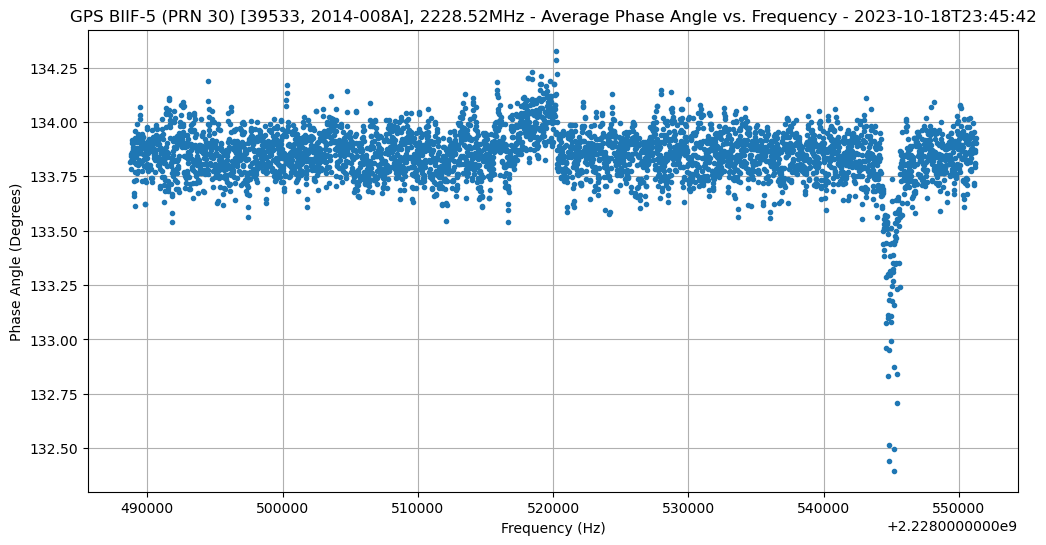

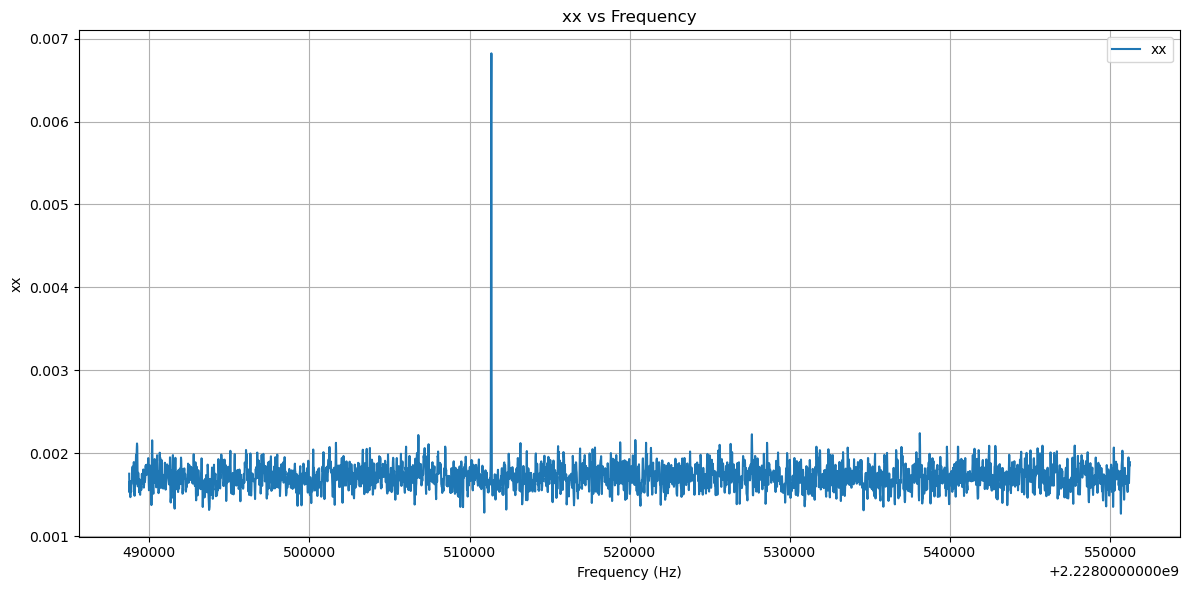

In [5]:
frequency_values = np.arange((samp_rate/decim1)/-2.0, (samp_rate/decim1)/2.0, (samp_rate/decim1)/nfft)
frequency_values += float(frequency) *1e6

peak_column_index = np.argmax(np.max(np.abs(xx), axis=0))
#xx_peak = xx[:, peak_column_index]
#yy_peak = yy[:, peak_column_index]
#gain_offset = np.average(xx_peak / yy_peak)
#print(gain_offset)

gain_offset = 0.4101715

print("peak frequency", frequency_values[peak_column_index])
print("Column Index for Peak Value:", peak_column_index)
print("Gain Offset:", gain_offset)
print("shape of XY: ", np.shape(xy))
yy *= gain_offset
xy *= np.sqrt(gain_offset)

n_rows,n_col = xy.shape
avg_complex_value = 0
for _ in range(n_rows):
    avg_complex_value += np.mean(xy, axis=0)
avg_complex_value /= n_rows
peak_value = np.max(np.abs(avg_complex_value))
peak_column_index = np.argmax(np.abs(avg_complex_value)) 
phase_angle_degrees = np.angle(avg_complex_value[peak_column_index], deg=True)
print("Column Index for Peak Value:", peak_column_index)
print("Complex Phase Angle (Degrees) of Peak Value:", phase_angle_degrees)

# NOTE: DSCOVR is LHCP, so using its phase to calibrate while keeping circular polarization convention.
#xy *= np.exp(-1j*np.deg2rad(phase_angle_degrees+180))*(-1j) # correct for X-Y phase offset


print("peak frequency", frequency_values[peak_column_index])

plt.figure(figsize=(12, 6))
#plt.ylim(phase_angle_degrees-10,phase_angle_degrees+10)
plt.plot(frequency_values, np.angle(avg_complex_value, deg=True), '.')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Angle (Degrees)')
plt.title(f'{object_observed}, {frequency}MHz - Average Phase Angle vs. Frequency - {formatted_datetime}')
plt.grid(True)

filename = f'{object_observed}_{formatted_datetime}_avg_phase_freq.png'
plt.savefig(filename)

# 2211.056e6, 0.5795452, -81.5
# 2228.520e6, 0.4101715, -48.0
xy *= np.exp(-1j*np.deg2rad(-48))*(-1j) # correct for X-Y phase offset

plt.figure(figsize=(12, 6))
plt.plot(frequency_values, xx[-1, :], label='xx', markersize=mark_size)
plt.title('xx vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('xx')
plt.grid(True)
plt.legend()
plt.tight_layout()

filename = f'{object_observed}_{formatted_datetime}_xx_freq.png'
plt.savefig(filename)

Minimum Value: -27.88843870162964
Maximum Value: -3.4809529781341553
19648.990069444444 19649.198522465278


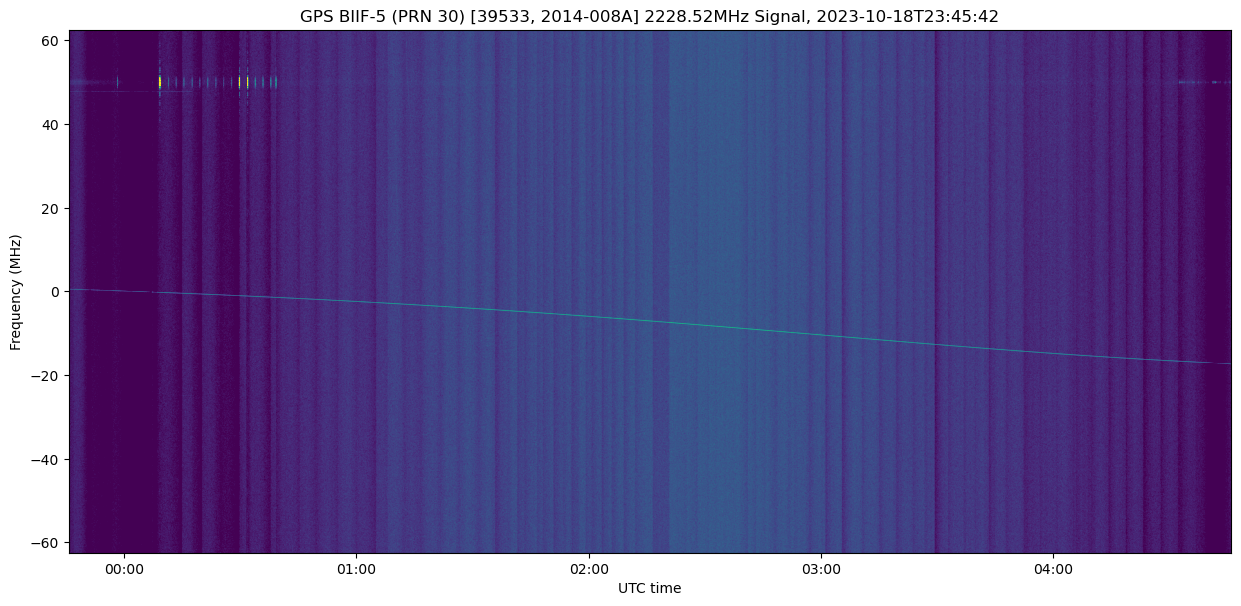

In [6]:
result = xx + yy
min_value = 10*np.log10(np.min(result))
max_value = 10*np.log10(np.max(result))
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)
print (mdates.date2num(t[0]),mdates.date2num(t[-1]))
#xaxis = mdates.date2num(t[-1]) - mdates.date2num(t[0])
#yaxis = np.max(frequency_values) - np.max(frequency_values)
#ratio = yaxis / xaxis

plt.figure(figsize = (15,15), facecolor = 'w')
plt.imshow(10*np.log10(xx+yy)[:,::-1].T, extent = (mdates.date2num(t[0]),mdates.date2num(t[-1]), -62.5, 62.5),
          aspect =7.5e-4, vmin =-26, vmax = -18)
plt.gca().set_xlim((t[0], t[-1]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')

title_text = f'{object_observed} {frequency}MHz Signal, {formatted_datetime}'
plt.title(title_text)

filename = f'{object_observed}_{formatted_datetime}_sig_plot.png'
plt.savefig(filename)

In [7]:
signal_peak = np.argmax(xx + yy, axis = 1)
offsets = np.arange(-2,3)
signal_xx = np.zeros(xx.shape[0])
signal_yy = np.zeros(yy.shape[0])
signal_xy = np.zeros(xy.shape[0], dtype = 'complex')
for offset in np.arange(-2,3):
    signal_xx += xx[np.arange(signal_peak.shape[0]), signal_peak + offset]
    signal_yy += yy[np.arange(signal_peak.shape[0]), signal_peak + offset]
    signal_xy += xy[np.arange(signal_peak.shape[0]), signal_peak + offset]
signal_xx /= offsets.size
signal_yy /= offsets.size
signal_xy /= offsets.size
gain_xx_yy = np.median(signal_xx + signal_yy)
signal_xx /= gain_xx_yy
signal_yy /= gain_xx_yy
signal_xy /= gain_xx_yy

In [8]:
I = signal_xx + signal_yy
Q = signal_xx - signal_yy
U = 2*signal_xy.real
V = -2*signal_xy.imag
L = Q + 1j*U
P = np.sqrt(Q**2 + U**2 + V**2)

2023-10-18T23:45:42.dat


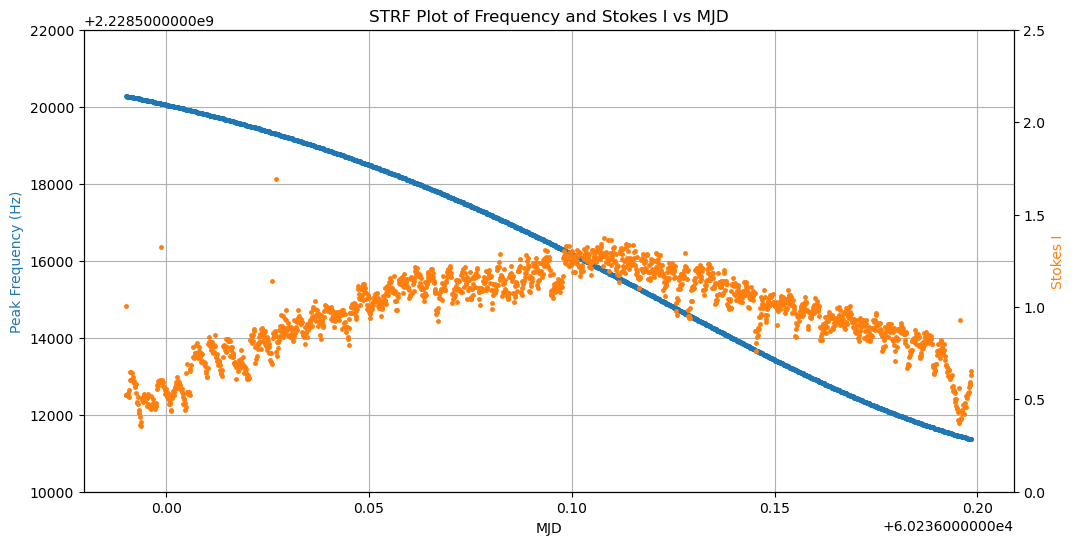

In [9]:
# STRF output in MJD, Peak_Frequency, Stokes I(dB), obs_site
n_rows = xy.shape[0]  # Replace 'xy' with your actual array
site_array = np.full((n_rows,), site)
rows = zip(datetime_to_mjd(t), find_peak_frequencies(xy, frequency_values), I, site_array)

output_file = f'{formatted_datetime}.dat'
print(output_file)

with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    writer.writerows(rows)

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()  # Create a new y-axis on the right

# Plot Peak Frequency (blue) on the left y-axis
ax1.plot(datetime_to_mjd(t), find_peak_frequencies(xy, frequency_values), '.', markersize=mark_size, color='C0')
ax1.set_xlabel('MJD')
ax1.set_ylabel('Peak Frequency (Hz)', color='C0')
ax1.grid(True)

# Plot Stokes I (orange) on the right y-axis
ax2.plot(datetime_to_mjd(t), I, '.', markersize=mark_size, color='C1')
ax2.set_ylabel('Stokes I', color='C1')

# Set Y-axis limits for both axes
ax1.set_ylim(2228.51e6, 2228.522e6)  # Adjust the limits as needed
ax2.set_ylim(0,2.5)  # Adjust the limits as needed

plt.title('STRF Plot of Frequency and Stokes I vs MJD')

filename = f'{object_observed}_{formatted_datetime}_STRF.png'
plt.savefig(filename)




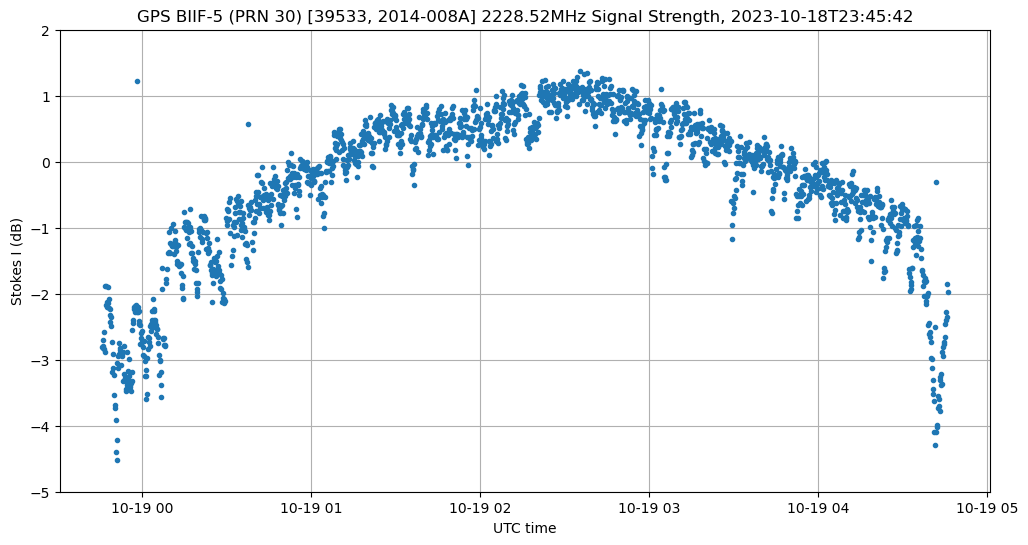

In [10]:
sel = slice(1,None)
y_min = -5  # Set your desired minimum Y value
y_max = 2   # Set your desired maximum Y value

plt.figure(figsize=(12, 6))
plt.grid(True)

plt.plot(t[sel], 10 * np.log10(I[sel]), '.')
plt.ylabel('Stokes I (dB)')
plt.xlabel('UTC time')

# Set the Y-axis limits
plt.ylim(y_min, y_max)

title_text = f'{object_observed} {frequency}MHz Signal Strength, {formatted_datetime}'
plt.title(title_text)

filename = f'{object_observed}_{formatted_datetime}_sig_strength.png'
plt.savefig(filename)


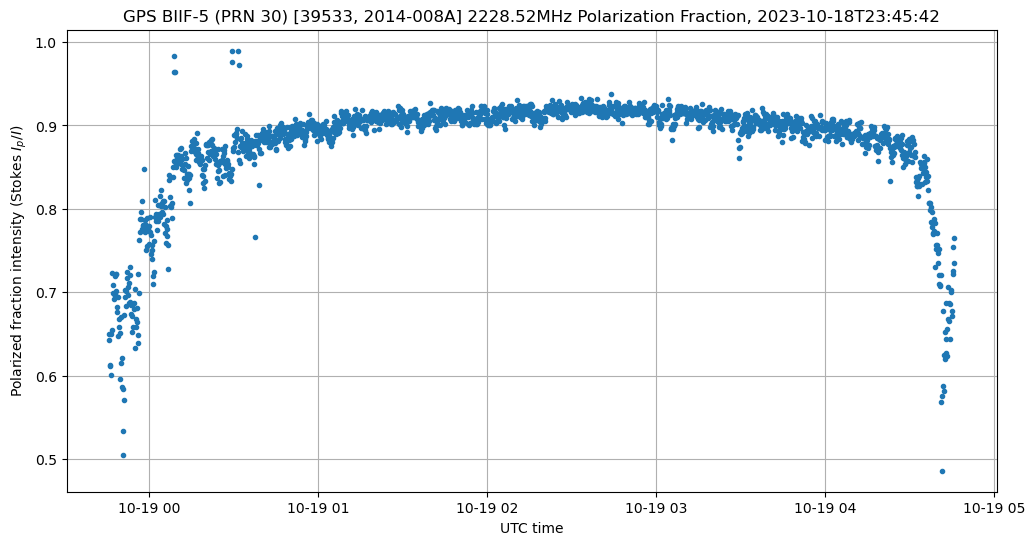

In [11]:
plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(t[sel], (P/I)[sel], '.')
plt.xlabel('UTC time')
plt.ylabel('Polarized fraction intensity (Stokes $I_p/I$)')
title_text = f'{object_observed} {frequency}MHz Polarization Fraction, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_pol_frac.png'
plt.savefig(filename)

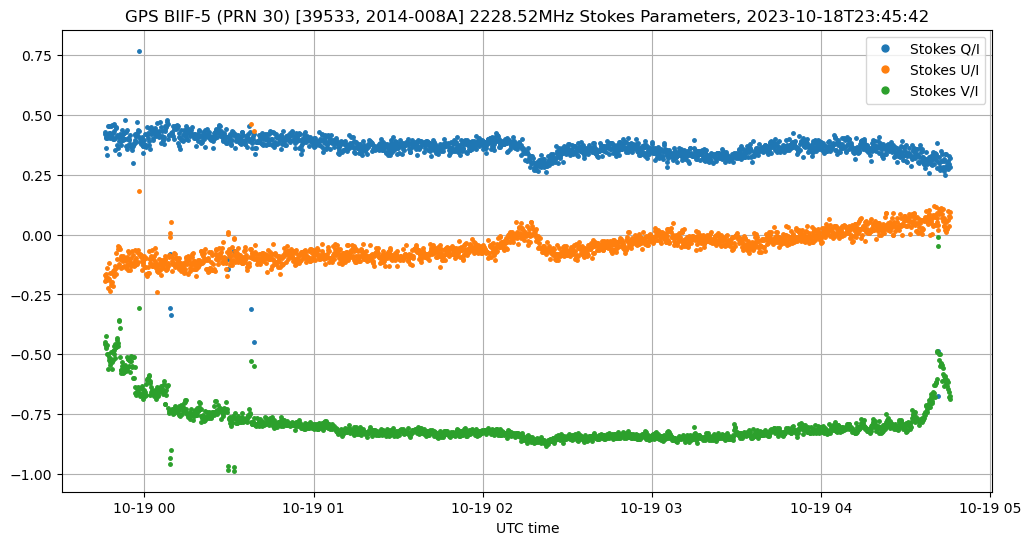

In [12]:
mark_size = 5
plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(t[sel], (Q/I)[sel], '.', markersize=mark_size)
plt.plot(t[sel], (U/I)[sel], '.', markersize=mark_size)
plt.plot(t[sel], (V/I)[sel], '.', markersize=mark_size)
legend = plt.legend(['Stokes Q/I', 'Stokes U/I', 'Stokes V/I'])
for handle in legend.legendHandles:
    handle.set_markersize(10)  # Adjust the marker size as needed
plt.xlabel('UTC time')
title_text = f'{object_observed} {frequency}MHz Stokes Parameters, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_stokes_par.png'
plt.savefig(filename)

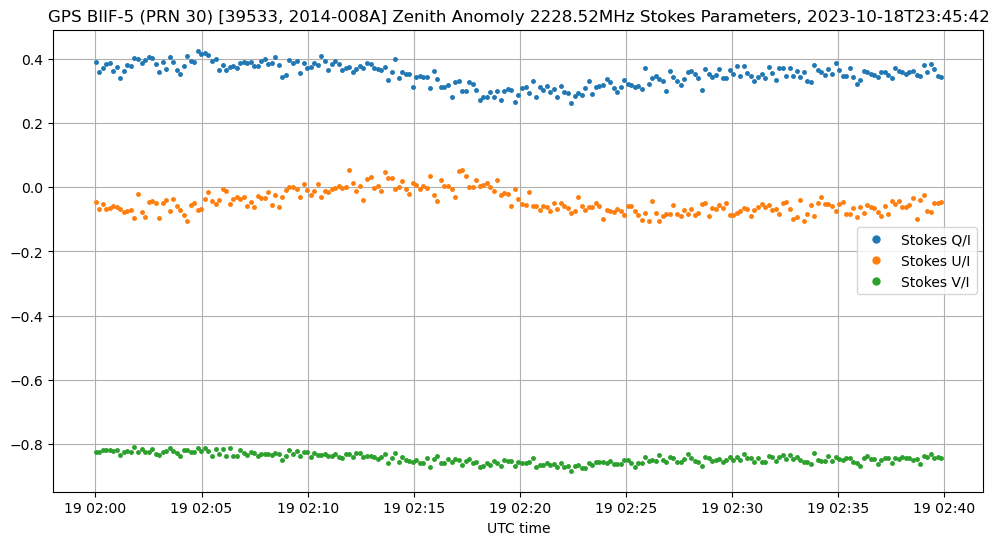

In [13]:
mark_size = 5

start_time = np.datetime64('2023-10-19T02:00:00')
end_time = np.datetime64('2023-10-19T02:40:00')

# Filter the data to select the data within the specified time range
time_range_filter = (t >= start_time) & (t <= end_time)
filtered_t = t[time_range_filter]
filtered_Q = Q[time_range_filter]
filtered_U = U[time_range_filter]
filtered_V = V[time_range_filter]
filtered_I = I[time_range_filter]

plt.figure(figsize = (12, 6))
plt.grid(True)
plt.plot(filtered_t, (filtered_Q/filtered_I), '.', markersize=mark_size)
plt.plot(filtered_t, (filtered_U/filtered_I), '.', markersize=mark_size)
plt.plot(filtered_t, (filtered_V/filtered_I), '.', markersize=mark_size)
legend = plt.legend(['Stokes Q/I', 'Stokes U/I', 'Stokes V/I'])
for handle in legend.legendHandles:
    handle.set_markersize(10)  # Adjust the marker size as needed
plt.xlabel('UTC time')
title_text = f'{object_observed} Zenith Anomoly {frequency}MHz Stokes Parameters, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_stokes_par.png'
plt.savefig(filename)


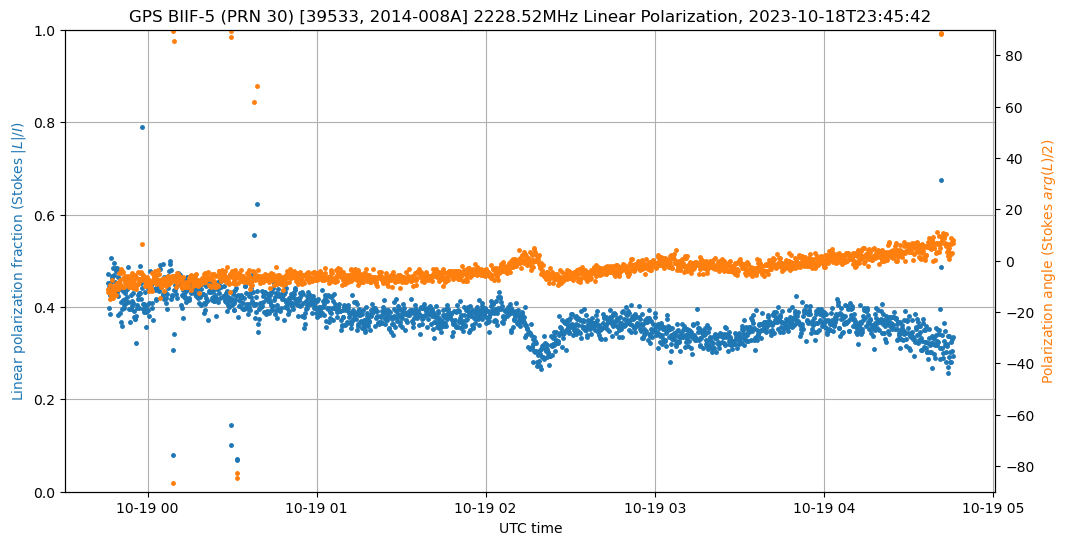

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(t[sel], (np.abs(L)/I)[sel], '.', markersize=mark_size)
plt.grid(True)

plt.ylim((0,1))
plt.xlabel('UTC time')
plt.ylabel('Linear polarization fraction (Stokes $|L|/I$)', color = 'C0')
ax2 = plt.gca().twinx()
plt.plot(t[sel], np.rad2deg(np.angle(L[sel])/2), '.', color = 'C1', markersize=mark_size)
ax2.set_ylabel('Polarization angle (Stokes $arg(L)/2$)', color = 'C1')
ax2.set_ylim((-90,90))
title_text = f'{object_observed} {frequency}MHz Linear Polarization, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_lin_pol.png'
plt.savefig(filename)

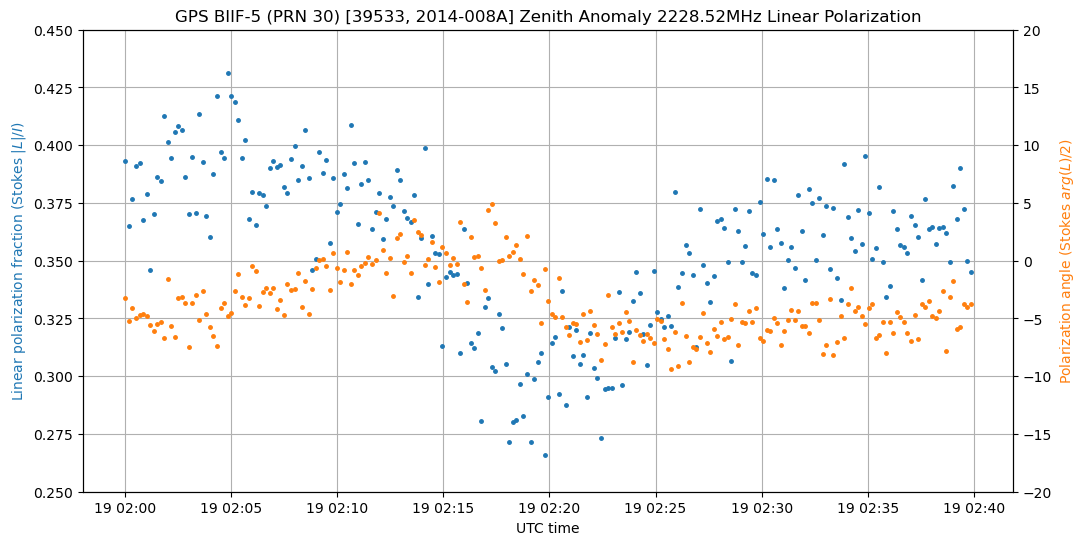

In [15]:
y_min = 0.25
y_max = 0.45

start_time = np.datetime64('2023-10-19T02:00:00')
end_time = np.datetime64('2023-10-19T02:40:00')

# Filter the data to select the data within the specified time range
time_range_filter = (t >= start_time) & (t <= end_time)
filtered_t = t[time_range_filter]
filtered_L = L[time_range_filter]
filtered_I = I[time_range_filter]

mark_size = 5

plt.figure(figsize=(12, 6))
plt.plot(filtered_t, (np.abs(filtered_L) / filtered_I), '.',  markersize=mark_size)
plt.grid(True)

# Set the Y-axis limits
plt.ylim(y_min, y_max)

plt.xlabel('UTC time')
plt.ylabel('Linear polarization fraction (Stokes $|L|/I$)', color='C0')
ax2 = plt.gca().twinx()
plt.plot(filtered_t, np.rad2deg(np.angle(filtered_L) / 2), '.', color='C1', markersize=mark_size)
ax2.set_ylabel('Polarization angle (Stokes $arg(L)/2$)', color='C1')
ax2.set_ylim(-20, 20)
title_text = f'{object_observed} Zenith Anomaly {frequency}MHz Linear Polarization'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_lin_pol2.png'
plt.savefig(filename)

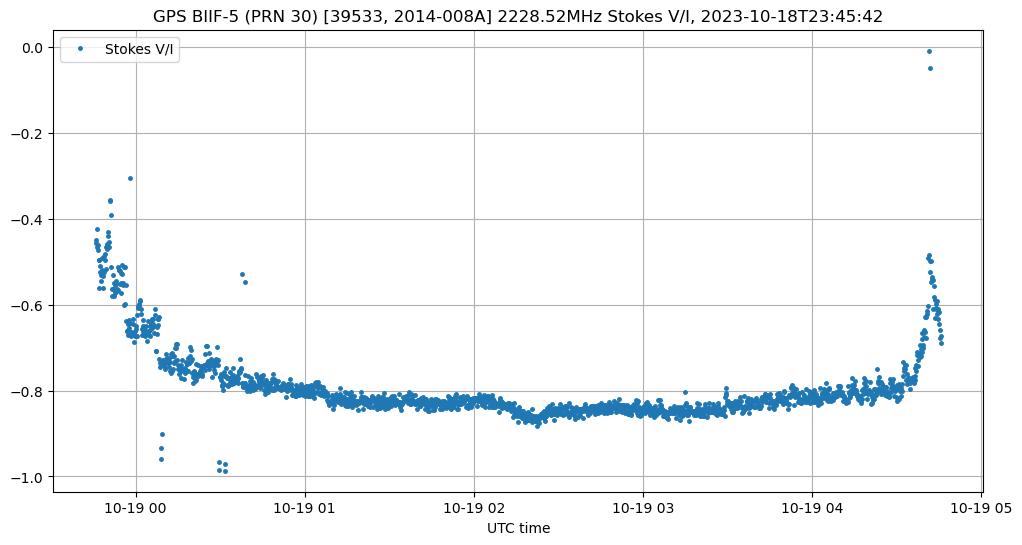

In [16]:
mark_size = 5
plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(t[sel], (V/I)[sel],'.',  markersize=mark_size)
plt.legend(['Stokes V/I'])
plt.xlabel('UTC time')
title_text = f'{object_observed} {frequency}MHz Stokes V/I, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_stokes_V_I.png'
plt.savefig(filename)

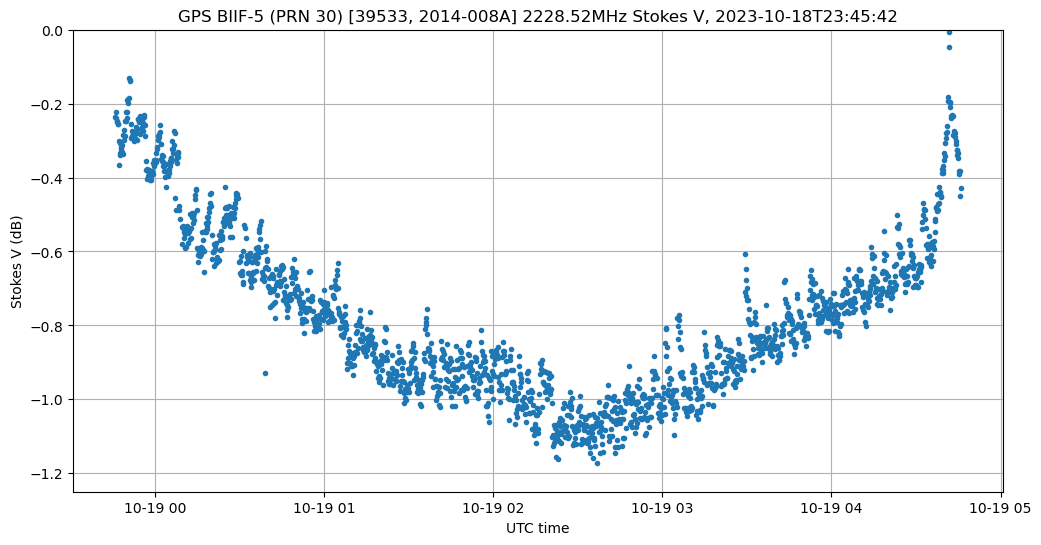

In [17]:
y_min = -1.25  # Set your desired minimum Y value
y_max = 0   # Set your desired maximum Y value

plt.figure(figsize=(12, 6))
plt.grid(True)

plt.plot(t[sel], (V)[sel], '.')
plt.xlabel('UTC time')
plt.ylabel('Stokes V (dB)')

# Set the Y-axis limits
plt.ylim(y_min, y_max)

title_text = f'{object_observed} {frequency}MHz Stokes V, {formatted_datetime}'
plt.title(title_text)
filename = f'{object_observed}_{formatted_datetime}_stokes_V.png'
plt.savefig(filename)
